Run the GLM on the Matlab stuff and see what I get

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
from scipy import io as sio
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [68]:
w_path = '/data1/guilimin/abide/subtype/sc7/full_maybe/sbt_weights_net_6.csv'
m_path = '/data1/guilimin/abide/pheno/sc7/model_full_maybe_sc7.csv'

In [69]:
# Model
model = pd.read_csv(m_path)
# Control = 0, ASD = 1
model.DX_GROUP = (model.DX_GROUP-2)*-1

In [70]:
# Weights
weights = pd.read_csv(w_path)
# Give subject column a name
weights.rename(columns={' ':'SUB_ID'}, inplace=True)
# Drop whitespace 
weights.columns = weights.columns.str.strip(' ')
# Get back to normal names
weights.SUB_ID = weights.SUB_ID.str.extract('(?<=sub_)(\d+)').astype(int)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [71]:
model.DX_GROUP.value_counts()

1    284
0    284
Name: DX_GROUP, dtype: int64

In [72]:
# Bring both of them together
merged = pd.merge(model, weights, on='SUB_ID', how='inner')

In [79]:
# Get the matrices
sbt_name = 'sub1'
y = merged[[sbt_name]]
x = merged[['DX_GROUP']]
#x.rename(columns={'dummie_KKI':'Intercept'}, inplace=True)
x['Intercept'] = np.ones(x.shape[0])

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
# ['Intercept', 'DX_GROUP', 'FD_scrubbed', 'AGE_AT_SCAN']
m = sm.OLS(y, x)
results = m.fit()

In [81]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   sub1   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     8.119
Date:                Thu, 23 Jun 2016   Prob (F-statistic):            0.00454
Time:                        23:08:02   Log-Likelihood:                 179.46
No. Observations:                 568   AIC:                            -354.9
Df Residuals:                     566   BIC:                            -346.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
DX_GROUP      -0.0423      0.015     -2.849      0.0

In [82]:
patients = merged[merged.DX_GROUP==1][sbt_name]
controls = merged[merged.DX_GROUP==0][sbt_name]
pat_std = np.std(patients)
ctr_std = np.std(controls)
n_pat = len(patients)
n_ctr = len(controls)
pooled_std = np.sqrt(((n_pat-1)*np.square(pat_std) + (n_ctr-1)*np.square(ctr_std))/(n_pat + n_ctr - 2))

(np.mean(patients) - np.mean(controls)) / pooled_std

-0.23954356833625337

In [83]:
np.sqrt(results.rsquared)

0.11892183794476077

In [91]:
# Try the correlation
np.corrcoef(merged.DX_GROUP, merged.sub1)

array([[ 1.        , -0.11892184],
       [-0.11892184,  1.        ]])

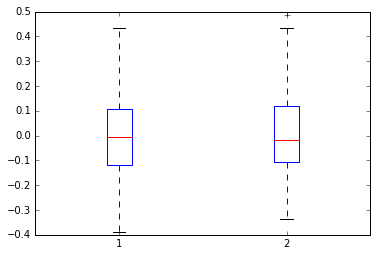

In [78]:
tmp = plt.boxplot([patients, controls])